In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('fjpenaca/Gaussian_splatting/run-lt7dl8z5-EvaluationMetrics:v0', type='run_table')
artifact_dir = artifact.download()

In [ ]:
import wandb
import os
import json
import pandas as pd

# Initialize a new W&B run
run = wandb.init()

# Use the artifact
artifact = run.use_artifact('fjpenaca/Gaussian_splatting/run-lt7dl8z5-EvaluationMetrics:v0', type='run_table')

# Download the artifact to get the directory where it's stored
artifact_dir = artifact.download()

# List all files in the artifact to find the table file
for name in artifact.manifest.entries.keys():
    print(name)

# Assuming the table file is named 'EvaluationMetrics.table.json.gz'
table_path = os.path.join(artifact_dir,'Evaluation Metrics.table.json')  # Adjust the path based on the printed names


# Load the table by reading the JSON file directly
with open(table_path, 'r') as f:
    table_json = json.load(f)

# Extract columns and data from the JSON
columns = table_json['columns']
data = table_json['data']

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=columns)


In [ ]:
df

In [1]:
import wandb
import os
import json
import pandas as pd
import gzip

# Initialize the W&B API
api = wandb.Api()

# Specify your project
project_path = 'fjpenaca/Gaussian_splatting'

# Get all runs in the project
runs = api.runs(project_path)

# Get all groups in the project
groups = set(run.group for run in runs if run.group is not None)
print("Available groups:", groups)

# Select one group (you can choose any)
selected_group = list(groups)[0]
print("Selected group:", selected_group)

# Filter runs that belong to the selected group
group_runs = [run for run in runs if run.group == selected_group]
print(f"Number of runs in group '{selected_group}': {len(group_runs)}")

# List to store DataFrames
dataframes = []
run_names = []


# Iterate over each run in the selected group
for run in group_runs:
    print(f"\nProcessing run: {run.name} ({run.id})")
    
    # Get artifacts logged by the run
    artifacts = run.logged_artifacts()
    
    # Flag to check if any table artifact is found
    table_found = False
    
    for artifact in artifacts:
        if artifact.type == 'run_table':
            print(f"  Found artifact: {artifact.name}")
            table_found = True
            
            # Download the artifact to get the directory where it's stored
            artifact_dir = artifact.download()
            
            # Find the table file within the artifact
            table_file = None
            for name in artifact.manifest.entries.keys():
                if name.endswith('.table.json'):
                    table_file = name
                    break
            
            if table_file:
                table_path = os.path.join(artifact_dir, table_file)
                
                # Load the table based on file extension
                with open(table_path, 'r') as f:
                    table_json = json.load(f)
                
                # Extract columns and data
                columns = table_json['columns']
                data = table_json['data']
                
                # Convert data to a pandas DataFrame
                df = pd.DataFrame(data, columns=columns)
                
                # Optionally, add run information to the DataFrame
                df['run_id'] = run.id
                df['run_name'] = run.name
                run_names.append(run.name)
                
                # Append the DataFrame to the list
                dataframes.append(df)
                print(f"  Loaded table from artifact '{artifact.name}'")
            else:
                print("  No table file found in artifact.")
    
    if not table_found:
        print("  No 'run_table' artifacts found for this run.")

# Combine all DataFrames into one
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print("\nCombined DataFrame:")
    print(combined_df)
else:
    print("No tables were loaded from the selected group.")


Available groups: {'Positive Only Gaussians', 'With Negative Gaussians'}
Selected group: Positive Only Gaussians
Number of runs in group 'Positive Only Gaussians': 10

Processing run: bright-morning-26 (3ckf32nq)


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


  Found artifact: run-3ckf32nq-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-3ckf32nq-EvaluationMetrics:v0'

Processing run: twilight-eon-27 (l1hl2qav)
  Found artifact: run-l1hl2qav-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-l1hl2qav-EvaluationMetrics:v0'

Processing run: quiet-plasma-28 (36a2tya2)
  Found artifact: run-36a2tya2-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-36a2tya2-EvaluationMetrics:v0'

Processing run: eternal-shadow-29 (vq1f1km2)
  Found artifact: run-vq1f1km2-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-vq1f1km2-EvaluationMetrics:v0'

Processing run: royal-wind-30 (ijk4qpef)
  Found artifact: run-ijk4qpef-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-ijk4qpef-EvaluationMetrics:v0'

Processing run: happy-yogurt-31 (pnzlejz4)
  Found artifact: run-pnzlejz4-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-pnzlejz4-EvaluationMetrics:v0'

Processing run: fanciful-morning-32 (m8mmneuw)
  Found artifact: run-m8mmneuw-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-m8mmneuw-EvaluationMetrics:v0'

Processing run: fragrant-grass-33 (x0w7xv6d)
  Found artifact: run-x0w7xv6d-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-x0w7xv6d-EvaluationMetrics:v0'

Processing run: amber-sky-34 (2wdcudo3)
  Found artifact: run-2wdcudo3-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-2wdcudo3-EvaluationMetrics:v0'

Processing run: vibrant-jazz-35 (q5e9x243)
  Found artifact: run-q5e9x243-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-q5e9x243-EvaluationMetrics:v0'

Combined DataFrame:
     Camera Index  total_loss   l1_loss  ssim_loss  depth_loss       psnr  \
0               0    0.030419  0.030476   0.030193    0.116130  19.795028   
1               1    0.018818  0.020402   0.012483    0.098668  25.931886   
2               2    0.020342  0.020812   0.018463    0.109611  25.057432   
3               3    0.038544  0.038005   0.040704    0.135196  21.571274   
4               4    0.024603  0.023781   0.027887    0.107582  24.838117   
..            ...         ...       ...        ...         ...        ...   
195            15    0.026443  0.025615   0.029757    0.121344  23.195707   
196            16    0.020870  0.021005   0.020329    0.107056  25.087596   
197            17    0.019557  0.020437   0.016039    0.097125  25.863881   
198            18    0.016139  0.017302   0.011484    0.113820  26.505595   
199            19    0.019098  0.019272   0.018404    0.098671  25.

In [24]:
import wandb
import os
import json
import pandas as pd

def get_camera_tables(group: str):

    # Initialize the W&B API
    api = wandb.Api()

    # Specify your project
    project_path = 'fjpenaca/Gaussian_splatting'

    # Get all runs in the project
    runs = api.runs(project_path)

    # # Get all groups in the project
    # groups = set(run.group for run in runs if run.group is not None)
    # print("Available groups:", groups)

    # # Select one group (you can choose any)
    # selected_group = list(groups)[0]
    # print("Selected group:", selected_group)

    # Filter runs that belong to the selected group
    group_runs = [run for run in runs if run.group == group]
    print(f"Number of runs in group '{group}': {len(group_runs)}")

    # List to store DataFrames
    dataframes = []
    # run_names = []


    # Iterate over each run in the selected group
    for run in group_runs:
        print(f"\nProcessing run: {run.name} ({run.id})")
        
        # Get artifacts logged by the run
        artifacts = run.logged_artifacts()
        
        # Flag to check if any table artifact is found
        table_found = False
        
        for artifact in artifacts:
            if artifact.type == 'run_table':
                print(f"  Found artifact: {artifact.name}")
                table_found = True
                
                # Download the artifact to get the directory where it's stored
                artifact_dir = artifact.download()
                
                # Find the table file within the artifact
                table_file = None
                for name in artifact.manifest.entries.keys():
                    if name.endswith('.table.json'):
                        table_file = name
                        break
                
                if table_file:
                    table_path = os.path.join(artifact_dir, table_file)
                    
                    # Load the table based on file extension
                    with open(table_path, 'r') as f:
                        table_json = json.load(f)
                    
                    # Extract columns and data
                    columns = table_json['columns']
                    data = table_json['data']
                    
                    # Convert data to a pandas DataFrame
                    df = pd.DataFrame(data, columns=columns)
                    
                    # Optionally, add run information to the DataFrame
                    df['run_id'] = run.id
                    df['run_name'] = run.name
                    # run_names.append(run.name)
                    
                    # Append the DataFrame to the list
                    dataframes.append(df)
                    print(f"  Loaded table from artifact '{artifact.name}'")
                else:
                    print("  No table file found in artifact.")
        
        if not table_found:
            print("  No 'run_table' artifacts found for this run.")

    # Combine all DataFrames into one
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        print("\nCombined DataFrame:")
        print(combined_df)
    else:
        print("No tables were loaded from the selected group.")

    return combined_df


def get_mean_std_per_camera(df: pd.DataFrame):
    mean_list_df = []
    std_list_df = []

    for camera_indx in range(0,20):

        camera_df = df[df['Camera Index'] == camera_indx]
        mean_df_c= camera_df.mean(numeric_only=True).to_frame(name='mean').T
        std_df_c= camera_df.std(numeric_only=True).to_frame(name='std').T

        mean_df_c['samples'] = len(camera_df)
        std_df_c['samples'] = len(camera_df)

        mean_list_df.append(mean_df_c)
        std_list_df.append(std_df_c)

    mean_df = pd.concat(mean_list_df, ignore_index=True)
    std_df = pd.concat(std_list_df, ignore_index=True)
    
    return mean_df, std_df




In [32]:
ng_combined_df = get_camera_tables('With Negative Gaussians')
ng_mean_df, ng_std_df = get_mean_std_per_camera(ng_combined_df)

pg_combined_df = get_camera_tables('Positive Only Gaussians')
pg_mean_df, pg_std_df = get_mean_std_per_camera(pg_combined_df)





Number of runs in group 'With Negative Gaussians': 10

Processing run: snowy-blaze-16 (y2k1agew)
  Found artifact: run-y2k1agew-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-y2k1agew-EvaluationMetrics:v0'

Processing run: blooming-valley-17 (fklweqhc)
  Found artifact: run-fklweqhc-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-fklweqhc-EvaluationMetrics:v0'

Processing run: dutiful-paper-18 (2q0460m2)
  Found artifact: run-2q0460m2-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-2q0460m2-EvaluationMetrics:v0'

Processing run: copper-frost-19 (8vuiov5a)
  Found artifact: run-8vuiov5a-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-8vuiov5a-EvaluationMetrics:v0'

Processing run: still-tree-20 (6tg9ies4)
  Found artifact: run-6tg9ies4-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-6tg9ies4-EvaluationMetrics:v0'

Processing run: mild-river-21 (ymwtm3aj)
  Found artifact: run-ymwtm3aj-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-ymwtm3aj-EvaluationMetrics:v0'

Processing run: whole-spaceship-22 (lhf367df)
  Found artifact: run-lhf367df-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-lhf367df-EvaluationMetrics:v0'

Processing run: good-mountain-23 (1wcdlu2h)
  Found artifact: run-1wcdlu2h-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-1wcdlu2h-EvaluationMetrics:v0'

Processing run: sparkling-pyramid-24 (10edfyyr)
  Found artifact: run-10edfyyr-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-10edfyyr-EvaluationMetrics:v0'

Processing run: silver-pond-25 (lt7dl8z5)
  Found artifact: run-lt7dl8z5-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-lt7dl8z5-EvaluationMetrics:v0'

Combined DataFrame:
     Camera Index  total_loss   l1_loss  ssim_loss  depth_loss       psnr  \
0               0    0.028182  0.028265   0.027851    0.091972  19.950801   
1               1    0.015764  0.017246   0.009840    0.091672  27.011329   
2               2    0.016385  0.016947   0.014137    0.092662  26.423907   
3               3    0.027725  0.028910   0.022985    0.119116  22.791323   
4               4    0.017174  0.017483   0.015941    0.087021  26.713969   
..            ...         ...       ...        ...         ...        ...   
195            15    0.017893  0.017704   0.018650    0.090509  25.982996   
196            16    0.017073  0.017430   0.015647    0.094331  26.235828   
197            17    0.016321  0.017346   0.012222    0.086690  27.089073   
198            18    0.013609  0.014748   0.009053    0.104058  27.537798   
199            19    0.015742  0.016043   0.014538    0.081119  26.

wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-3ckf32nq-EvaluationMetrics:v0'

Processing run: twilight-eon-27 (l1hl2qav)
  Found artifact: run-l1hl2qav-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-l1hl2qav-EvaluationMetrics:v0'

Processing run: quiet-plasma-28 (36a2tya2)
  Found artifact: run-36a2tya2-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-36a2tya2-EvaluationMetrics:v0'

Processing run: eternal-shadow-29 (vq1f1km2)
  Found artifact: run-vq1f1km2-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-vq1f1km2-EvaluationMetrics:v0'

Processing run: royal-wind-30 (ijk4qpef)
  Found artifact: run-ijk4qpef-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-ijk4qpef-EvaluationMetrics:v0'

Processing run: happy-yogurt-31 (pnzlejz4)
  Found artifact: run-pnzlejz4-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-pnzlejz4-EvaluationMetrics:v0'

Processing run: fanciful-morning-32 (m8mmneuw)
  Found artifact: run-m8mmneuw-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-m8mmneuw-EvaluationMetrics:v0'

Processing run: fragrant-grass-33 (x0w7xv6d)
  Found artifact: run-x0w7xv6d-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-x0w7xv6d-EvaluationMetrics:v0'

Processing run: amber-sky-34 (2wdcudo3)
  Found artifact: run-2wdcudo3-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-2wdcudo3-EvaluationMetrics:v0'

Processing run: vibrant-jazz-35 (q5e9x243)
  Found artifact: run-q5e9x243-EvaluationMetrics:v0


wandb:   1 of 1 files downloaded.  


  Loaded table from artifact 'run-q5e9x243-EvaluationMetrics:v0'

Combined DataFrame:
     Camera Index  total_loss   l1_loss  ssim_loss  depth_loss       psnr  \
0               0    0.030419  0.030476   0.030193    0.116130  19.795028   
1               1    0.018818  0.020402   0.012483    0.098668  25.931886   
2               2    0.020342  0.020812   0.018463    0.109611  25.057432   
3               3    0.038544  0.038005   0.040704    0.135196  21.571274   
4               4    0.024603  0.023781   0.027887    0.107582  24.838117   
..            ...         ...       ...        ...         ...        ...   
195            15    0.026443  0.025615   0.029757    0.121344  23.195707   
196            16    0.020870  0.021005   0.020329    0.107056  25.087596   
197            17    0.019557  0.020437   0.016039    0.097125  25.863881   
198            18    0.016139  0.017302   0.011484    0.113820  26.505595   
199            19    0.019098  0.019272   0.018404    0.098671  25.

In [51]:
pg_mean_df.mean()



Camera Index        9.500000
total_loss          0.026898
l1_loss             0.027660
ssim_loss           0.023854
depth_loss          0.111050
psnr               24.088442
pos             16384.000000
negs                0.000000
samples            10.000000
dtype: float64

In [50]:
ng_mean_df.mean()

Camera Index        9.500000
total_loss          0.022024
l1_loss             0.023266
ssim_loss           0.017057
depth_loss          0.097218
psnr               25.209234
pos             16328.900000
negs               55.100000
samples            10.000000
dtype: float64

In [45]:

import matplotlib.pyplot as plt






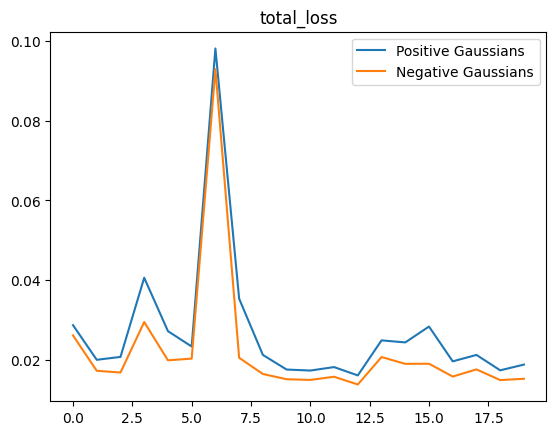

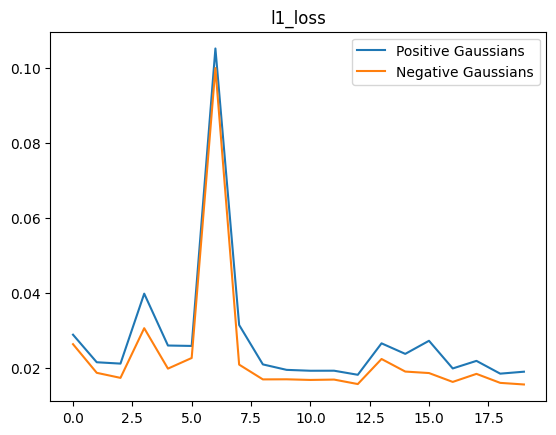

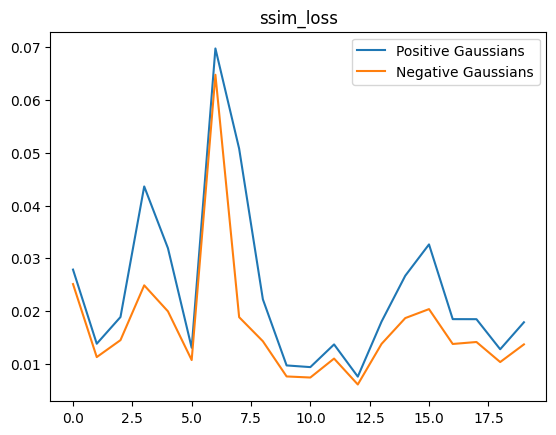

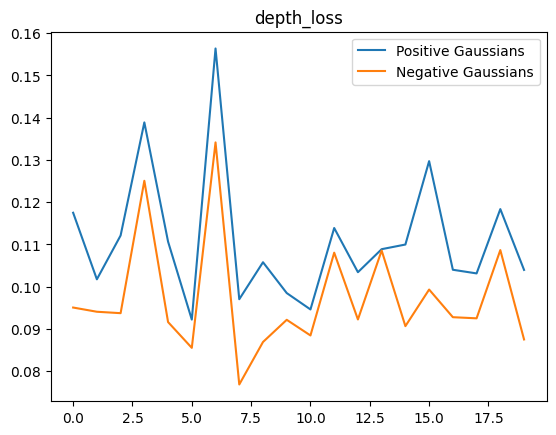

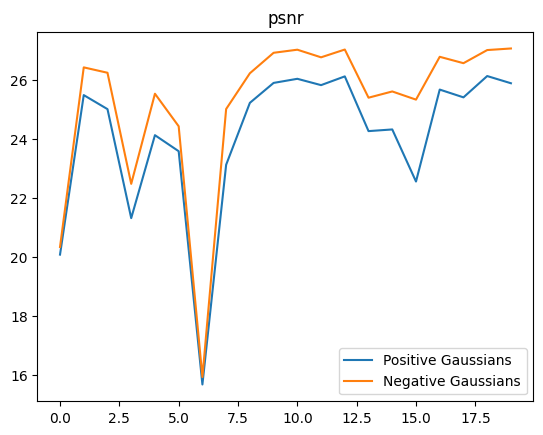

In [49]:
ng_mean_df.columns

columns = ['total_loss', 'l1_loss', 'ssim_loss', 'depth_loss', 'psnr']

for column in columns:
    ng = ng_mean_df.loc[:,column].to_list()
    pg = pg_mean_df.loc[:,column].to_list()

    plt.figure()

    plt.plot(pg, label='Positive Gaussians')
    plt.plot(ng, label='Negative Gaussians')

    plt.legend()
    plt.title(column)






In [40]:
ng_mean_df

,Camera Index,total_loss,l1_loss,ssim_loss,depth_loss,psnr,pos,negs,samples
0,0.0,0.026067,0.026306,0.025113,0.095088,20.331387,16328.9,55.1,10
1,1.0,0.017183,0.018659,0.011278,0.094093,26.430933,16328.9,55.1,10
2,2.0,0.016746,0.017310,0.014491,0.093757,26.248072,16328.9,55.1,10
3,3.0,0.029436,0.030576,0.024874,0.125068,22.475279,16328.9,55.1,10
4,4.0,0.019814,0.019782,0.019946,0.091653,25.535879,16328.9,55.1,10
5,5.0,0.020239,0.022619,0.010717,0.085554,24.430818,16328.9,55.1,10
6,6.0,0.092987,0.100040,0.064774,0.134144,15.913530,16328.9,55.1,10
7,7.0,0.020449,0.020852,0.018839,0.076892,25.016370,16328.9,55.1,10
8,8.0,0.016378,0.016903,0.014281,0.086939,26.230688,16328.9,55.1,10
9,9.0,0.015065,0.016928,0.007610,0.092188,26.926301,16328.9,55.1,10


In [43]:
ng_mean_df.loc[:,'total_loss'].to_list()

[0.026067331433296204,
 0.017182975821197034,
 0.016746194288134574,
 0.029435599222779274,
 0.01981441993266344,
 0.02023856174200773,
 0.09298659563064575,
 0.02044918593019247,
 0.01637831162661314,
 0.015064590983092785,
 0.014888365846127271,
 0.015684052277356385,
 0.013744006492197513,
 0.02063745241612196,
 0.01892948467284441,
 0.018951600044965745,
 0.01573775401338935,
 0.017529942467808722,
 0.014848792273551226,
 0.015174078568816186]